In [124]:
# import packages
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
outdata_path = '../outdata/'

In [125]:
from parameters import *
from MM_Traj_Utils import LoadTrajFromPath, FindHomeRunNodes
from MM_Maze_Utils import NewMaze
from plot_utils import plot_nodes_vs_time, plot_maze_stats, PlotMazeFunction_gradientcmap, plot_visit_freq

In [126]:
from utils import convert_traj_to_episodes, calculate_visit_frequency

In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
%matplotlib inline

In [129]:
UnrewNamesSub

['B5', 'B6', 'B7', 'D3', 'D4', 'D5', 'D7', 'D8', 'D9']

In [130]:
RewNames

['B1', 'B2', 'B3', 'B4', 'C1', 'C3', 'C6', 'C7', 'C8', 'C9']

In [131]:
base_path = '/Users/usingla/mouse-maze/figs'

In [132]:
from plot_utils import plot_trajs, plot_episode_lengths, \
    plot_exploration_efficiency, plot_reward_path_lengths, plot_maze_stats

In [133]:
import evaluation_metrics as em

In [83]:
# unrewarded
tf=LoadTrajFromPath(outdata_path+'B5-tf')
print(sum([len(b) for b in tf.no]))
unrew_epi = convert_traj_to_episodes(tf)
new_end_nodes_found_unrew = em.exploration_efficiency(unrew_epi, re=False)

15301


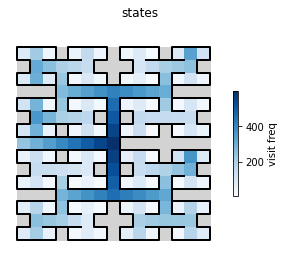

<AxesSubplot:>

In [84]:
visit_frequency_unrew = calculate_visit_frequency(unrew_epi)
plot_maze_stats(visit_frequency_unrew, "state_values", 'Blues', colorbar_label="visit freq", figtitle=f'states')

In [ ]:
# all Rewarded animals before first reward

mouse B1
bout 17 first reward index 354


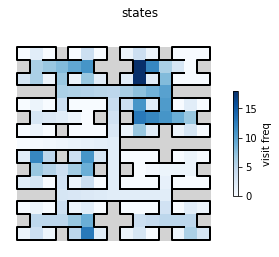

===
mouse B2
bout 1 first reward index 10


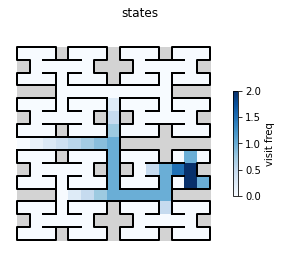

===
mouse B3
bout 5 first reward index 14


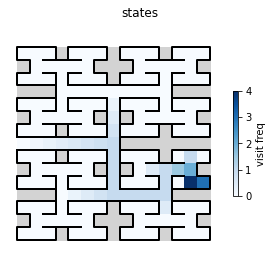

===
mouse B4
bout 2 first reward index 388


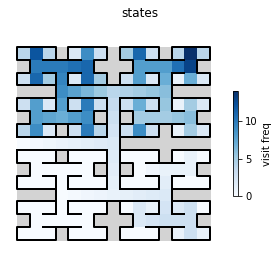

===
mouse C1
bout 2 first reward index 88


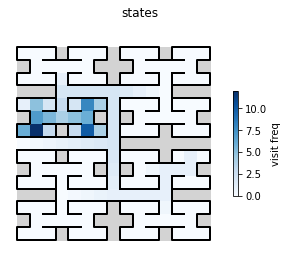

===
mouse C3
bout 2 first reward index 46


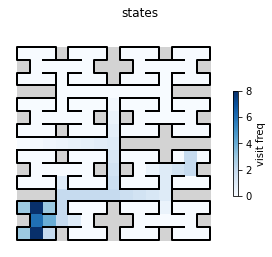

===
mouse C6
bout 2 first reward index 1960


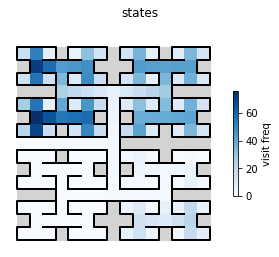

===
mouse C7
bout 0 first reward index 358


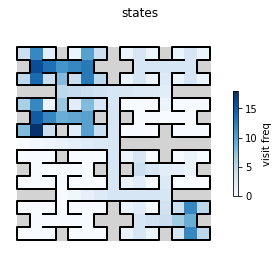

===
mouse C8
bout 1 first reward index 38


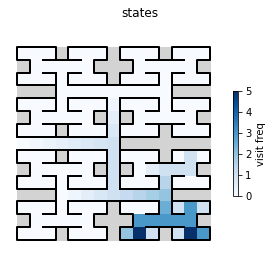

===
mouse C9
bout 3 first reward index 88


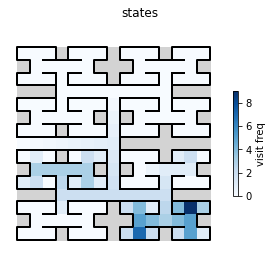

===


In [167]:
for name in RewNames:
    tf=LoadTrajFromPath(outdata_path+f'{name}-tf')
    print("mouse", name)
    rew_epi = convert_traj_to_episodes(tf)

    for e, epi in enumerate(rew_epi):
        try:
            re_i = epi.index(RWD_NODE)
            break
        except ValueError:
            continue
    print("bout", e, "first reward index", re_i)
    rew_epi_exp = [rew_epi[e][:re_i]]
    visit_frequency_rew = calculate_visit_frequency(rew_epi_exp)
    plot_maze_stats(visit_frequency_rew, "state_values", 'Blues', colorbar_label="visit freq", figtitle=f'states')
    print("===")

9249


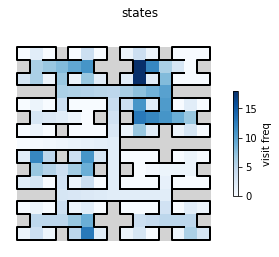

<AxesSubplot:>

In [85]:
# rewarded
tf=LoadTrajFromPath(outdata_path+'B1-tf')
print(sum([len(b) for b in tf.no]))
rew_epi = convert_traj_to_episodes(tf)
rew_epi_exp = [rew_epi[17][:354]]
new_end_nodes_found_rew = em.exploration_efficiency(rew_epi_exp, re=False)
visit_frequency_rew = calculate_visit_frequency(rew_epi_exp)
plot_maze_stats(visit_frequency_rew, "state_values", 'Blues', colorbar_label="visit freq", figtitle=f'states')

16334


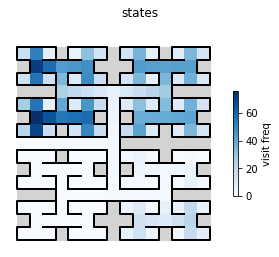

<AxesSubplot:>

In [173]:
# another rewarded
tf=LoadTrajFromPath(outdata_path+'C6-tf')
print(sum([len(b) for b in tf.no]))
rew_epi = convert_traj_to_episodes(tf)
rew_epi_exp = [rew_epi[2][:1960]]
new_end_nodes_found_rew_c6 = em.exploration_efficiency(rew_epi_exp, re=False)
visit_frequency_rew = calculate_visit_frequency(rew_epi_exp)
plot_maze_stats(visit_frequency_rew, "state_values", 'Blues', colorbar_label="visit freq", figtitle=f'states')

### Models

In [201]:
from Epsilon3Greedy_model import Epsilon3Greedy
from Epsilon2Greedy_model import Epsilon2Greedy
from TD_UCB_model import TD_UCBpolicy
from Dyna_Qplus import DynaQPlus
from DFS import DFS

In [165]:
MAX_LENGTH = 20000

In [136]:
# DFS
simulation_results_dfs = DFS().simulate_multiple({0: {}}, MAX_LENGTH=MAX_LENGTH, N_BOUTS_TO_GENERATE=1)
new_end_nodes_found_dfs = simulation_results_dfs[0][1]['exp_efficiency']

agentId 0 {}


In [193]:
agent_id = 0
model1 = Epsilon3Greedy()
param_sets_e3g = {}
for eps in np.arange(0.1, 1, 0.2):
    eps = round(eps, 2)
    param_sets_e3g[agent_id] = {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "epsilon": eps, 'V': 'zero'}
    agent_id += 1

simulation_results_e3g = model1.simulate_multiple(param_sets_e3g, MAX_LENGTH=MAX_LENGTH, N_BOUTS_TO_GENERATE=1)

sub_fits {0: {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'epsilon': 0.1, 'V': 'zero'}, 1: {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'epsilon': 0.3, 'V': 'zero'}, 2: {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'epsilon': 0.5, 'V': 'zero'}, 3: {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'epsilon': 0.7, 'V': 'zero'}, 4: {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'epsilon': 0.9, 'V': 'zero'}}


In [ ]:
agent_id = 0
model1 = Epsilon2Greedy()
param_sets_e2g = {}
for eps in np.arange(0.1, 1, 0.2):
    eps = round(eps, 2)
    param_sets_e2g[agent_id] = {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "epsilon": eps, 'V': 'zero'}
    agent_id += 1

simulation_results_e2g = model1.simulate_multiple(param_sets_e2g, MAX_LENGTH=MAX_LENGTH, N_BOUTS_TO_GENERATE=1)

In [297]:
agent_id = 0
model1 = TD_UCBpolicy()
param_sets_ucb = {}
for c in np.arange(0.1, 1, 0.2):
    c = round(c, 2)
    param_sets_ucb[agent_id] = {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "c": c, 'V': 'zero'}
    agent_id += 1

for c in np.arange(1, 20, 3):
    c = round(c, 2)
    param_sets_ucb[agent_id] = {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "c": c, 'V': 'zero'}
    agent_id += 1

simulation_results_ucb = model1.simulate_multiple(param_sets_ucb, MAX_LENGTH=MAX_LENGTH, N_BOUTS_TO_GENERATE=1)

agentId 0 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'c': 0.1, 'V': 'one'}
agentId 1 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'c': 0.3, 'V': 'one'}
agentId 2 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'c': 0.5, 'V': 'one'}
agentId 3 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'c': 0.7, 'V': 'one'}
agentId 4 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'c': 0.9, 'V': 'one'}
agentId 5 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'c': 4, 'V': 'one'}


In [207]:
agent_id = 0
model1 = DynaQPlus()
param_sets_dynaqplus = {}
# for eps in [0.0, 0.1]:
#     for k in [0.0, 0.001, 0.01, 0.03]:
#         for n_plan in [0, 5, 25]:
#             param_sets_dynaqplus[agent_id] = {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "epsilon": eps, 'n_plan': n_plan, 'k': k, 'V': 'one'}
#             agent_id += 1

param_sets_dynaqplus = {
        0: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.0, "n_plan": 0, "back_action": True},
        1: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.1, "n_plan": 0, "back_action": True},
        2: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.5, "n_plan": 0, "back_action": True},
        3: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.8, "n_plan": 0, "back_action": True},

        4: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.0, "n_plan": 50, "back_action": True},
        5: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.1, "n_plan": 50, "back_action": True},
        6: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.5, "n_plan": 50, "back_action": True},
        7: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.8, "n_plan": 50, "back_action": True},

        8: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.0, "n_plan": 5000, "back_action": True},
        9: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.1, "n_plan": 5000, "back_action": True},
        10: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.5, "n_plan": 5000, "back_action": True},
        11: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.8, "n_plan": 5000, "back_action": True},

        12: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.0, "n_plan": 50000, "back_action": True},
        13: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.1, "n_plan": 50000, "back_action": True},
        14: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.5, "n_plan": 50000, "back_action": True},
        15: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.8, "n_plan": 50000, "back_action": True},

        16: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.0, "n_plan": 100000, "back_action": True},
        17: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.1, "n_plan": 100000, "back_action": True},
        18: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.5, "n_plan": 100000, "back_action": True},
        19: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.8, "n_plan": 100000, "back_action": True},

        20: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.0, "n_plan": 1000000, "back_action": True},
        21: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.1, "n_plan": 1000000, "back_action": True},
        22: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
            "epsilon": 0.5, "n_plan": 1000000, "back_action": True},
        23: {"alpha": 0.1, "gamma": 0.9, "lamda": 0.7, "k": 0.001,
             "epsilon": 0.8, "n_plan": 1000000, "back_action": True},
}

simulation_results_dynaqplus = model1.simulate_multiple(param_sets_dynaqplus, MAX_LENGTH=MAX_LENGTH, N_BOUTS_TO_GENERATE=1)

agentId 0 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.0, 'n_plan': 0, 'back_action': True}
agentId 1 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.1, 'n_plan': 0, 'back_action': True}
agentId 2 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.8, 'n_plan': 0, 'back_action': True}
agentId 3 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.0, 'n_plan': 50, 'back_action': True}
agentId 4 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.1, 'n_plan': 50, 'back_action': True}
agentId 5 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.8, 'n_plan': 50, 'back_action': True}
agentId 6 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.0, 'n_plan': 5000, 'back_action': True}
agentId 7 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsilon': 0.1, 'n_plan': 5000, 'back_action': True}
agentId 8 {'alpha': 0.1, 'gamma': 0.9, 'lamda': 0.7, 'k': 0.001, 'epsil

In [206]:
# Plot model results

agentId 0 : 0.001-dyna-0-plan-0.0-eps-0.7-lamda

agentId 3 : 0.001-dyna-50-plan-0.0-eps-0.7-lamda

agentId 6 : 0.001-dyna-5000-plan-0.0-eps-0.7-lamda

agentId 9 : 0.001-dyna-50000-plan-0.0-eps-0.7-lamda

agentId 12 : 0.001-dyna-100000-plan-0.0-eps-0.7-lamda

agentId 15 : 0.001-dyna-1000000-plan-0.0-eps-0.7-lamda



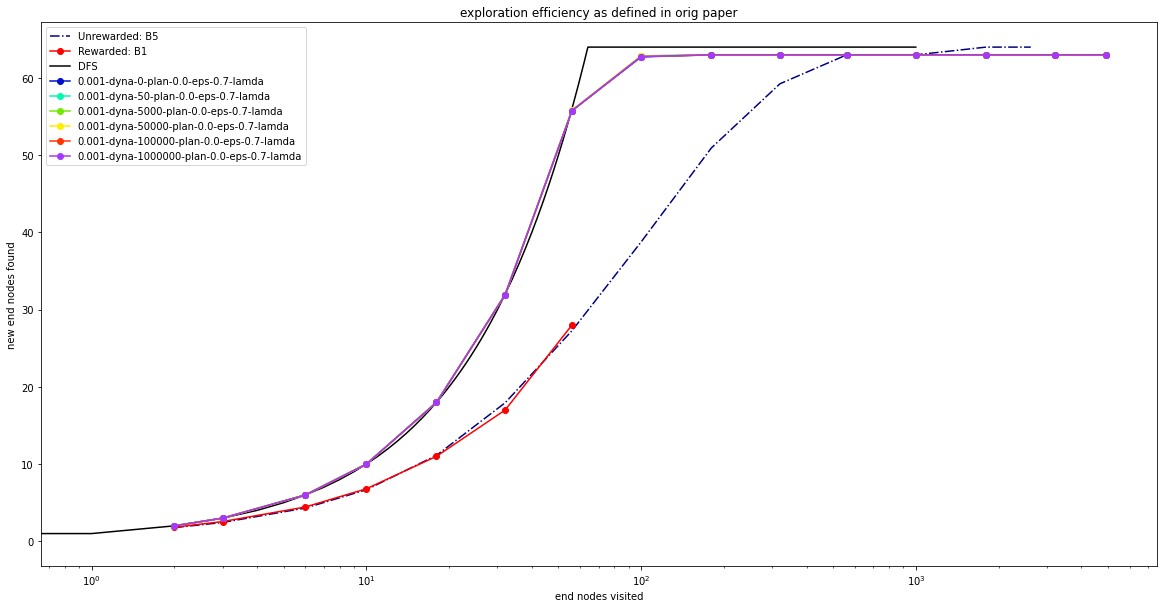

In [227]:
# only dynas
fig1 = plt.figure(figsize=(20, 10))
plt.xscale('log', base=10)
colormap = plt.cm.gist_ncar

plt.plot(new_end_nodes_found_unrew.keys(), new_end_nodes_found_unrew.values(), color=colormap(0), linestyle='-.', label='Unrewarded: B5')
plt.plot(new_end_nodes_found_rew.keys(), new_end_nodes_found_rew.values(), 'ro-', label='Rewarded: B1')
plt.plot(new_end_nodes_found_dfs.keys(), new_end_nodes_found_dfs.values(), 'black', label='DFS')

for i, sr in enumerate(simulation_results_dynaqplus):
    success, stats1 = sr
    k = param_sets_dynaqplus[stats1["agentId"]]["k"]
    eps = param_sets_dynaqplus[stats1["agentId"]]["epsilon"]
    n_plan = param_sets_dynaqplus[stats1["agentId"]]["n_plan"]
    lamda = param_sets_dynaqplus[stats1["agentId"]]["lamda"]
    if eps != 0.0:
        continue
    print("agentId", stats1["agentId"], ":", f'{k}-dyna-{n_plan}-plan-{eps}-eps-{lamda}-lamda')
    episodes1 = stats1["episodes"]
    V1 = stats1["V"]
    new_end_nodes_found1 = stats1["exploration_efficiency"]
#     print(new_end_nodes_found1)
#     print(V1)
    plt.plot(new_end_nodes_found1.keys(), new_end_nodes_found1.values(), color=colormap(0.1 + 0.05*i), linestyle='-', marker="o", label=f'{k}-dyna-{n_plan}-plan-{eps}-eps-{lamda}-lamda')
    print()

plt.title("exploration efficiency as defined in orig paper")
plt.xlabel("end nodes visited")
plt.ylabel("new end nodes found")
plt.legend()

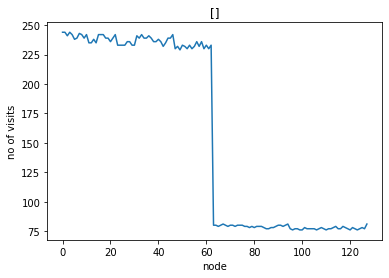

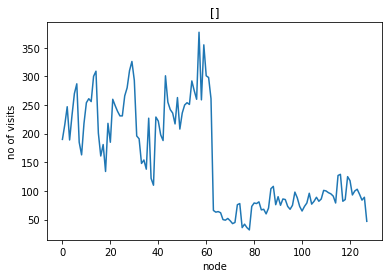

In [215]:
plot_visit_freq(simulation_results_dynaqplus[0][1]["visit_frequency"], title=[], save_file_path=None, display=True)
plot_visit_freq(simulation_results_dynaqplus[14][1]["visit_frequency"], title=[], save_file_path=None, display=True)

In [178]:
simulation_results_dynaqplus[3][1]['visit_frequency']

array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       9.580e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 9.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.190e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

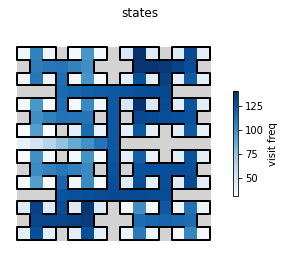

<AxesSubplot:>

In [23]:
plot_maze_stats(simulation_results_dynaqplus[0][1]['visit_frequency'], "state_values", 'Blues', colorbar_label="visit freq", figtitle=f'states')

n_plan = 0 k = 0.001


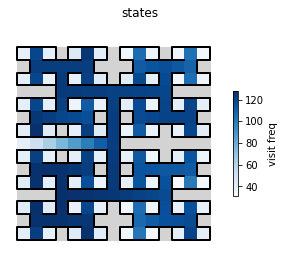

n_plan = 0 k = 0.001


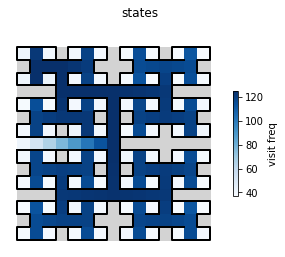

n_plan = 5 k = 0.001


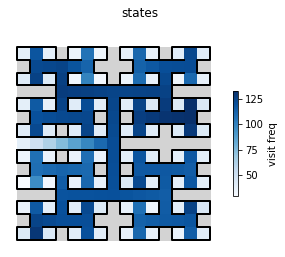

n_plan = 5 k = 0.001


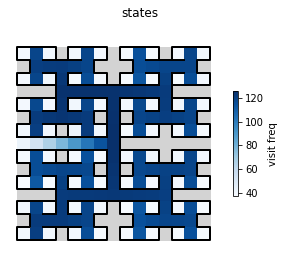

n_plan = 50000 k = 0.001


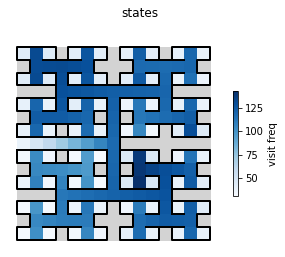

n_plan = 50000 k = 0.001


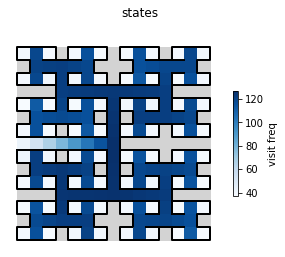

In [37]:
for s in simulation_results_dynaqplus:
    print("n_plan =",param_sets_dynaqplus[s[1]["agentId"]]["n_plan"], "k =", param_sets_dynaqplus[s[1]["agentId"]]["k"])
    plot_maze_stats(calculate_visit_frequency(s[1]['episodes']), "state_values", 'Blues', colorbar_label="visit freq", figtitle=f'states')